# Github Job Postings - Collected Data through WEB APIS


In [10]:
import requests
import pandas as pd
import json


##### Begin :: Collect number of job postings for the following languages using the API


In [11]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"
response = requests.get(baseurl)
data = response.json()
data
# print(data)


{'technology': {'0': 'java',
  '1': 'C',
  '2': 'C#',
  '3': 'C++',
  '4': 'Java',
  '5': 'JavaScript',
  '6': 'Python',
  '7': 'Scala',
  '8': 'Oracle',
  '9': 'SQL Server',
  '10': 'MySQL Server',
  '11': 'PostgreSQL',
  '12': 'MongoDB',
  '13': 'java',
  '14': 'C',
  '15': 'C#',
  '16': 'C++',
  '17': 'Java',
  '18': 'JavaScript',
  '19': 'Python',
  '20': 'Scala',
  '21': 'Oracle',
  '22': 'SQL Server',
  '23': 'MySQL Server',
  '24': 'PostgreSQL',
  '25': 'MongoDB',
  '26': 'C',
  '27': 'MySQL Server',
  '28': 'SQL Server',
  '29': 'PostgreSQL',
  '30': 'Java',
  '31': 'PostgreSQL',
  '32': 'Java',
  '33': 'C',
  '34': 'MongoDB',
  '35': 'Oracle',
  '36': 'PostgreSQL',
  '37': 'MongoDB',
  '38': 'MySQL Server',
  '39': 'Java',
  '40': 'JavaScript',
  '41': 'Python',
  '42': 'C',
  '43': 'MongoDB',
  '44': 'MySQL Server',
  '45': 'PostgreSQL',
  '46': 'Oracle',
  '47': 'Java',
  '48': 'JavaScript',
  '49': 'Java',
  '50': 'Java',
  '51': 'MySQL Server',
  '52': 'C++',
  '53': 'Java

In [12]:
data = df = pd.DataFrame(data)
data.rename(columns={"A": "technology",
            "B": "number of job posting"}, inplace=True)
data[(data["technology"] != "technology") & (
    data["number of job posting"] != "number of job posting")]
data['number of job posting'] = data['number of job posting'].astype(int)

data


,technology,number of job posting
0,java,1
1,C,10
2,C#,1
3,C++,1
4,Java,2
...,...,...
251,C#,1
252,PostgreSQL,1
253,MongoDB,1
254,Scala,2


##### End :: Collect number of job postings for the following languages using the API


In [13]:
# Writing a function to get the number of jobs for the given technology

def get_number_of_jobs(technology):
    number_of_jobs = data.groupby('technology').sum().loc[technology, :][0]
    return technology, number_of_jobs


print(get_number_of_jobs('Python'))


('Python', 51)


#### Storing the results in an excel file

Calling the API for all the given technologies above, and writing the results in an excel spreadsheet.


In [14]:
# Create a python list of all technologies for which will be
# needed to find the number of jobs postings.

technologies = ['C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala',
                'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']


In [15]:
# Importing libraries required to create an excel spreadsheet
from openpyxl import Workbook
!pip3 install openpyxl


In [16]:
# Creating a workbook and selecting the active worksheet
wb = Workbook()
ws = wb.active
# Finding the number of jobs postings for reach technology in the above list.
# Writing the technology name and the number of jobs postings into excep spreadsheet.

ws.append(['Tech', 'Num'])
for job in technologies:
    value = list(get_number_of_jobs(job))
    ws.append(value)

# Saving into an excel spreadsheet named 'github-job-postings.xlsx'
wb.save("github-job-postings.xlsx")


In [17]:
df = pd.read_excel("github-job-postings.xlsx")
df.head()


,Tech,Num
0,C,184
1,C#,14
2,C++,24
3,Java,83
4,JavaScript,65


In [18]:
df.sort_values(by=['Num'], axis=0, ascending=False, inplace=True)
df.set_index('Tech', inplace=True)
df.head()


,Num
Tech,
C,184
Java,83
JavaScript,65
Python,51
Scala,47


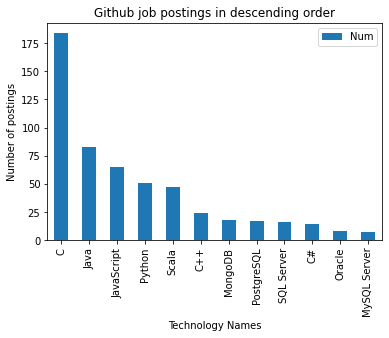

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.plot(kind='bar', label=True)
plt.title("Github job postings in descending order")
plt.xlabel("Technology Names")
plt.ylabel("Number of postings")

plt.show()


<b> Observation </b> <br>

Based on the chart, we find there is a huge demand for people who know the <i> C Programming language</i>. C is one of the preceding programming languages existed in the early stages of software development, hence most companies built their foundations based off of it, which might be the reason why it's still in high-demand.
